# Feature Engineering(Dhaka-2019 Dataset)

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
m1 = pd.read_csv("G:\\KHULNA DATA CSV\\2019_jan_1.csv")
m2 = pd.read_csv("G:\\KHULNA DATA CSV\\2019_may_2.csv")
m3 = pd.read_csv("G:\\KHULNA DATA CSV\\2019_june_3.csv")
m4 = pd.read_csv("G:\\KHULNA DATA CSV\\2019_july_4.csv")
m5 = pd.read_csv("G:\\KHULNA DATA CSV\\2019_august_5.csv")
m6 = pd.read_csv("G:\\KHULNA DATA CSV\\2019_september_6.csv")
m7 = pd.read_csv("G:\\KHULNA DATA CSV\\2019_october_7.csv")
m8 = pd.read_csv("G:\\KHULNA DATA CSV\\2019_november_8.csv")
m9 = pd.read_csv("G:\\KHULNA DATA CSV\\2019_dec_9.csv")

In [5]:
frames = [m1,m2,m3,m4,m5,m6,m7,m8,m9]
data = pd.concat(frames)

In [6]:
data.head()

,Day,T,TM,Tm,SLP,H,PP,VV,V,VM,AQI,Category
0,1,16.6,27,11.2,1018.9,81,0,4.5,0,-,NaN,NaN
1,2,17.3,27,12.4,1018.5,77,0,4.7,0,-,98.0,M
2,3,17.6,26.7,12,1018.6,68,0,4.8,0.2,1.9,198.0,U
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.0,EU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.0,EU


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 30
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       276 non-null    int64  
 1   T         186 non-null    object 
 2   TM        186 non-null    object 
 3   Tm        186 non-null    object 
 4   SLP       186 non-null    object 
 5   H         186 non-null    object 
 6   PP        186 non-null    object 
 7   VV        186 non-null    object 
 8   V         186 non-null    object 
 9   VM        186 non-null    object 
 10  AQI       161 non-null    float64
 11  Category  161 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 28.0+ KB


In [8]:
data.isnull().sum()

Day           0
T            90
TM           90
Tm           90
SLP          90
H            90
PP           90
VV           90
V            90
VM           90
AQI         115
Category    115
dtype: int64

In [9]:
aqi = data.replace("-",np.nan)
aqi

,Day,T,TM,Tm,SLP,H,PP,VV,V,VM,AQI,Category
0,1,16.6,27,11.2,1018.9,81,0,4.5,0,NaN,NaN,NaN
1,2,17.3,27,12.4,1018.5,77,0,4.7,0,NaN,98.0,M
2,3,17.6,26.7,12,1018.6,68,0,4.8,0.2,1.9,198.0,U
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.0,EU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.0,EU
...,...,...,...,...,...,...,...,...,...,...,...,...
26,27,15.4,18.0,12.8,1015.4,91.0,0.0,5.0,0.4,3.5,162.0,U
27,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0,U
28,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,U
29,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,VU


In [10]:
aqi.isnull().sum()

Day           0
T           172
TM          172
Tm          172
SLP         172
H           172
PP          172
VV          172
V           172
VM          209
AQI         115
Category    115
dtype: int64

<AxesSubplot:>

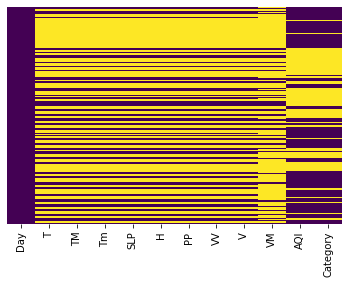

In [11]:
sns.heatmap(aqi.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
aqi = aqi.drop(['PP'], axis = 1)
aqi

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,16.6,27,11.2,1018.9,81,4.5,0,NaN,NaN,NaN
1,2,17.3,27,12.4,1018.5,77,4.7,0,NaN,98.0,M
2,3,17.6,26.7,12,1018.6,68,4.8,0.2,1.9,198.0,U
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.0,EU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.0,EU
...,...,...,...,...,...,...,...,...,...,...,...
26,27,15.4,18.0,12.8,1015.4,91.0,5.0,0.4,3.5,162.0,U
27,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0,U
28,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,U
29,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,VU


# Missing value Handling
               1. Delete row data.
               2. Create new model.
               3. Statistical Method(Mean,Median,Mode)

               But here we use Statistical Method(Mean)
T = Average Temperature (°C) , TM = Maximum temperature (°C),

Tm = Minimum temperature (°C), SLP= Atmospheric pressure at sea level (hPa),

H = Average relative humidity (%), VV = Average visibility (Km),

V = Average wind speed (Km/h), VM = Maximum sustained wind speed (Km/h), AQI = Air Quality Index

# Convert object type as float type

In [13]:
aqi['T'] = aqi['T'].replace({'NAN':np.nan}).astype(float)
aqi['TM'] = aqi['TM'].replace({'NAN':np.nan}).astype(float)
aqi['Tm'] = aqi['Tm'].replace({'NAN':np.nan}).astype(float)
aqi['SLP'] = aqi['SLP'].replace({'NAN':np.nan}).astype(float)
aqi['H'] = aqi['H'].replace({'NAN':np.nan}).astype(float)
aqi['VV'] = aqi['VV'].replace({'NAN':np.nan}).astype(float)
aqi['V'] = aqi['V'].replace({'NAN':np.nan}).astype(float)
aqi['VM'] = aqi['VM'].replace({'NAN':np.nan}).astype(float)

# Month-1 (January)

In [14]:
df1 = aqi.iloc[0:31,0:11]
df1

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,16.6,27.0,11.2,1018.9,81.0,4.5,0.0,NaN,NaN,NaN
1,2,17.3,27.0,12.4,1018.5,77.0,4.7,0.0,NaN,98.0,M
2,3,17.6,26.7,12.0,1018.6,68.0,4.8,0.2,1.9,198.0,U
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.0,EU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.0,EU
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,VU
6,7,18.5,27.7,11.5,1013.8,73.0,5.0,0.4,3.5,253.0,VU
7,8,17.4,27.0,12.5,1013.5,77.0,4.7,0.0,NaN,191.0,U
8,9,18.1,25.7,12.3,1015.7,73.0,4.7,0.4,3.5,251.0,VU
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288.0,VU


In [15]:
df1.isnull().sum()

Day          0
T           24
TM          24
Tm          24
SLP         24
H           24
VV          24
V           24
VM          28
AQI          3
Category     3
dtype: int64

In [16]:
df1["T"] = df1["T"].fillna(value=df1["T"].mean())
df1["TM"] = df1["TM"].fillna(value=df1["TM"].mean())
df1["Tm"] = df1["Tm"].fillna(value=df1["Tm"].mean())
df1["SLP"] = df1["SLP"].fillna(value=df1["SLP"].mean())
df1["H"] = df1["H"].fillna(value=df1["H"].mean())
df1["VV"] = df1["VV"].fillna(value=df1["VV"].mean())
df1["V"] = df1["V"].fillna(value=df1["V"].mean())
df1["VM"] = df1["VM"].fillna(value=df1["VM"].mean())
df1["AQI"] = df1["AQI"].fillna(value=df1["AQI"].mean())

In [17]:
df1

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,16.600000,27.000000,11.200000,1018.900000,81.000000,4.5,0.000000,2.966667,251.357143,NaN
1,2,17.300000,27.000000,12.400000,1018.500000,77.000000,4.7,0.000000,2.966667,98.000000,M
2,3,17.600000,26.700000,12.000000,1018.600000,68.000000,4.8,0.200000,1.900000,198.000000,U
3,4,17.857143,26.728571,11.957143,1016.257143,73.571429,4.7,0.142857,2.966667,311.000000,EU
4,5,17.857143,26.728571,11.957143,1016.257143,73.571429,4.7,0.142857,2.966667,309.000000,EU
5,6,17.857143,26.728571,11.957143,1016.257143,73.571429,4.7,0.142857,2.966667,210.000000,VU
6,7,18.500000,27.700000,11.500000,1013.800000,73.000000,5.0,0.400000,3.500000,253.000000,VU
7,8,17.400000,27.000000,12.500000,1013.500000,77.000000,4.7,0.000000,2.966667,191.000000,U
8,9,18.100000,25.700000,12.300000,1015.700000,73.000000,4.7,0.400000,3.500000,251.000000,VU
9,10,17.857143,26.728571,11.957143,1016.257143,73.571429,4.7,0.142857,2.966667,288.000000,VU


In [18]:
df1.isnull().sum()

Day         0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    3
dtype: int64

# Month-5 (May)

In [19]:
df2 = aqi.iloc[31:62,0:11]
df2

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,G
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,G
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,M
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,M
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,C
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,C
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.0,C
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,C
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,C


In [20]:
df2.isnull().sum()

Day          0
T           28
TM          28
Tm          28
SLP         28
H           28
VV          28
V           28
VM          28
AQI         10
Category    10
dtype: int64

In [21]:
df2["T"] = df2["T"].fillna(value=df2["T"].mean())
df2["TM"] = df2["TM"].fillna(value=df2["TM"].mean())
df2["Tm"] = df2["Tm"].fillna(value=df2["Tm"].mean())
df2["SLP"] = df2["SLP"].fillna(value=df2["SLP"].mean())
df2["H"] = df2["H"].fillna(value=df2["H"].mean())
df2["VV"] = df2["VV"].fillna(value=df2["VV"].mean())
df2["V"] = df2["V"].fillna(value=df2["V"].mean())
df2["VM"] = df2["VM"].fillna(value=df2["VM"].mean())
df2["AQI"] = df2["AQI"].fillna(value=df2["AQI"].mean())

In [22]:
df2

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,31.066667,35.966667,26.9,1004.266667,74.666667,6.533333,3.566667,4.766667,25.000000,G
1,2,31.066667,35.966667,26.9,1004.266667,74.666667,6.533333,3.566667,4.766667,31.000000,G
2,3,31.066667,35.966667,26.9,1004.266667,74.666667,6.533333,3.566667,4.766667,67.000000,M
3,4,31.066667,35.966667,26.9,1004.266667,74.666667,6.533333,3.566667,4.766667,79.142857,NaN
4,5,31.066667,35.966667,26.9,1004.266667,74.666667,6.533333,3.566667,4.766667,69.000000,M
5,6,31.066667,35.966667,26.9,1004.266667,74.666667,6.533333,3.566667,4.766667,110.000000,C
6,7,31.066667,35.966667,26.9,1004.266667,74.666667,6.533333,3.566667,4.766667,104.000000,C
7,8,31.066667,35.966667,26.9,1004.266667,74.666667,6.533333,3.566667,4.766667,144.000000,C
8,9,31.066667,35.966667,26.9,1004.266667,74.666667,6.533333,3.566667,4.766667,103.000000,C
9,10,31.066667,35.966667,26.9,1004.266667,74.666667,6.533333,3.566667,4.766667,109.000000,C


In [23]:
df2.isnull().sum()

Day          0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    10
dtype: int64

# Month-6 (June)

In [24]:
df3 = aqi.iloc[62:92,0:11]
df3

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,31.5,36.2,29.0,1003.5,79.0,6.3,1.3,3.5,NaN,NaN
1,2,26.1,33.5,24.0,1004.5,93.0,6.0,3.1,5.4,NaN,NaN
2,3,30.5,35.2,25.6,1003.4,73.0,6.4,2.2,5.4,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,31.6,36.2,28.0,1000.6,78.0,6.4,1.9,3.5,NaN,NaN


In [25]:
df3.isnull().sum()

Day          0
T           19
TM          19
Tm          19
SLP         19
H           19
VV          19
V           19
VM          20
AQI         28
Category    28
dtype: int64

In [26]:
df3["T"] = df3["T"].fillna(value=df3["T"].mean())
df3["TM"] = df3["TM"].fillna(value=df3["TM"].mean())
df3["Tm"] = df3["Tm"].fillna(value=df3["Tm"].mean())
df3["SLP"] = df3["SLP"].fillna(value=df3["SLP"].mean())
df3["H"] = df3["H"].fillna(value=df3["H"].mean())
df3["VV"] = df3["VV"].fillna(value=df3["VV"].mean())
df3["V"] = df3["V"].fillna(value=df3["V"].mean())
df3["VM"] = df3["VM"].fillna(value=df3["VM"].mean())
df3["AQI"] = df3["AQI"].fillna(value=df3["AQI"].mean())

In [27]:
df3

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,31.500000,36.200000,29.000000,1003.500000,79.000000,6.300000,1.3,3.50,45.5,NaN
1,2,26.100000,33.500000,24.000000,1004.500000,93.000000,6.000000,3.1,5.40,45.5,NaN
2,3,30.500000,35.200000,25.600000,1003.400000,73.000000,6.400000,2.2,5.40,45.5,NaN
3,4,30.690909,35.609091,27.872727,1000.836364,81.727273,6.345455,1.5,3.94,45.5,NaN
4,5,30.690909,35.609091,27.872727,1000.836364,81.727273,6.345455,1.5,3.94,45.5,NaN
5,6,30.690909,35.609091,27.872727,1000.836364,81.727273,6.345455,1.5,3.94,45.5,NaN
6,7,30.690909,35.609091,27.872727,1000.836364,81.727273,6.345455,1.5,3.94,45.5,NaN
7,8,30.690909,35.609091,27.872727,1000.836364,81.727273,6.345455,1.5,3.94,45.5,NaN
8,9,30.690909,35.609091,27.872727,1000.836364,81.727273,6.345455,1.5,3.94,45.5,NaN
9,10,31.600000,36.200000,28.000000,1000.600000,78.000000,6.400000,1.9,3.50,45.5,NaN


In [28]:
df3.isnull().sum()

Day          0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    28
dtype: int64

# Month-7 (July)

In [29]:
df4 = aqi.iloc[92:123,0:11]
df4

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,28.8,32.7,28.1,996.8,92.0,6.0,3.1,5.4,24.0,G
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,G
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,G
3,4,30.4,34.2,27.8,998.6,85.0,6.3,1.9,3.5,NaN,NaN
4,5,29.6,33.5,27.5,995.3,90.0,6.3,2.8,7.6,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,M
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,M
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,G
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,G


In [30]:
df4.isnull().sum()

Day          0
T           19
TM          19
Tm          19
SLP         19
H           19
VV          19
V           19
VM          21
AQI         22
Category    22
dtype: int64

In [31]:
df4["T"] = df4["T"].fillna(value=df4["T"].mean())
df4["TM"] = df4["TM"].fillna(value=df4["TM"].mean())
df4["Tm"] = df4["Tm"].fillna(value=df4["Tm"].mean())
df4["SLP"] = df4["SLP"].fillna(value=df4["SLP"].mean())
df4["H"] = df4["H"].fillna(value=df4["H"].mean())
df4["VV"] = df4["VV"].fillna(value=df4["VV"].mean())
df4["V"] = df4["V"].fillna(value=df4["V"].mean())
df4["VM"] = df4["VM"].fillna(value=df4["VM"].mean())
df4["AQI"] = df4["AQI"].fillna(value=df4["AQI"].mean())

In [32]:
df4

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,28.800000,32.7,28.100000,996.800000,92.0,6.000000,3.10,5.40,24.000000,G
1,2,29.516667,34.2,27.058333,1000.541667,86.0,6.258333,2.75,6.37,40.000000,G
2,3,29.516667,34.2,27.058333,1000.541667,86.0,6.258333,2.75,6.37,33.000000,G
3,4,30.400000,34.2,27.800000,998.600000,85.0,6.300000,1.90,3.50,43.555556,NaN
4,5,29.600000,33.5,27.500000,995.300000,90.0,6.300000,2.80,7.60,43.555556,NaN
5,6,29.516667,34.2,27.058333,1000.541667,86.0,6.258333,2.75,6.37,43.555556,NaN
6,7,29.516667,34.2,27.058333,1000.541667,86.0,6.258333,2.75,6.37,52.000000,M
7,8,29.516667,34.2,27.058333,1000.541667,86.0,6.258333,2.75,6.37,62.000000,M
8,9,29.516667,34.2,27.058333,1000.541667,86.0,6.258333,2.75,6.37,47.000000,G
9,10,29.516667,34.2,27.058333,1000.541667,86.0,6.258333,2.75,6.37,39.000000,G


In [33]:
df4.isnull().sum()

Day          0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    22
dtype: int64

# Month-8(August)

In [34]:
df5 = aqi.iloc[123:154,0:11]
df5

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,28.5,33.0,27.2,1000.5,86.0,6.4,2.8,5.4,NaN,NaN
1,2,29.4,34.2,26.8,999.2,83.0,6.4,2.8,7.6,NaN,NaN
2,3,30.2,34.2,27.4,997.9,79.0,6.8,1.9,3.5,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,G
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,M
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,G
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,G
7,8,27.1,29.0,26.5,997.2,94.0,5.8,4.6,14.8,NaN,NaN
8,9,29.2,33.0,27.0,1001.0,91.0,6.0,0.4,1.9,NaN,NaN
9,10,30.8,35.2,27.6,999.6,79.0,6.3,0.4,1.9,NaN,NaN


In [35]:
df5.isnull().sum()

Day          0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          17
AQI         18
Category    18
dtype: int64

In [36]:
df5["T"] = df5["T"].fillna(value=df5["T"].mean())
df5["TM"] = df5["TM"].fillna(value=df5["TM"].mean())
df5["Tm"] = df5["Tm"].fillna(value=df5["Tm"].mean())
df5["SLP"] = df5["SLP"].fillna(value=df5["SLP"].mean())
df5["H"] = df5["H"].fillna(value=df5["H"].mean())
df5["VV"] = df5["VV"].fillna(value=df5["VV"].mean())
df5["V"] = df5["V"].fillna(value=df5["V"].mean())
df5["VM"] = df5["VM"].fillna(value=df5["VM"].mean())
df5["AQI"] = df5["AQI"].fillna(value=df5["AQI"].mean())

In [37]:
df5

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,28.500000,33.00,27.200000,1000.50,86.000000,6.400000,2.800000,5.400000,37.692308,NaN
1,2,29.400000,34.20,26.800000,999.20,83.000000,6.400000,2.800000,7.600000,37.692308,NaN
2,3,30.200000,34.20,27.400000,997.90,79.000000,6.800000,1.900000,3.500000,37.692308,NaN
3,4,29.486667,33.12,27.353333,1001.48,84.133333,6.213333,1.793333,4.664286,38.000000,G
4,5,29.486667,33.12,27.353333,1001.48,84.133333,6.213333,1.793333,4.664286,52.000000,M
5,6,29.486667,33.12,27.353333,1001.48,84.133333,6.213333,1.793333,4.664286,19.000000,G
6,7,29.486667,33.12,27.353333,1001.48,84.133333,6.213333,1.793333,4.664286,20.000000,G
7,8,27.100000,29.00,26.500000,997.20,94.000000,5.800000,4.600000,14.800000,37.692308,NaN
8,9,29.200000,33.00,27.000000,1001.00,91.000000,6.000000,0.400000,1.900000,37.692308,NaN
9,10,30.800000,35.20,27.600000,999.60,79.000000,6.300000,0.400000,1.900000,37.692308,NaN


In [38]:
df5.isnull().sum()

Day          0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    18
dtype: int64

# Month-9 (September)

In [39]:
df6 = aqi.iloc[154:184,0:11]
df6

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,28.7,34.2,26.2,1000.7,90.0,6.3,0.9,3.5,58.0,M
1,2,29.8,34.5,27.5,1000.5,87.0,6.3,1.3,5.4,21.0,G
2,3,29.2,31.8,27.3,999.9,84.0,6.0,2.2,5.4,17.0,G
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,G
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,G
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,G
6,7,28.6,31.5,27.2,1000.2,90.0,6.3,3.1,5.4,23.0,G
7,8,28.6,31.0,27.3,1001.8,94.0,6.0,0.0,NaN,44.0,G
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,G
9,10,29.4,34.0,27.2,1002.0,87.0,6.4,2.2,5.4,23.0,G


In [40]:
df6.isnull().sum()

Day          0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          19
AQI          6
Category     6
dtype: int64

In [41]:
df6["T"] = df6["T"].fillna(value=df6["T"].mean())
df6["TM"] = df6["TM"].fillna(value=df6["TM"].mean())
df6["Tm"] = df6["Tm"].fillna(value=df6["Tm"].mean())
df6["SLP"] = df6["SLP"].fillna(value=df6["SLP"].mean())
df6["H"] = df6["H"].fillna(value=df6["H"].mean())
df6["VV"] = df6["VV"].fillna(value=df6["VV"].mean())
df6["V"] = df6["V"].fillna(value=df6["V"].mean())
df6["VM"] = df6["VM"].fillna(value=df6["VM"].mean())
df6["AQI"] = df6["AQI"].fillna(value=df6["AQI"].mean())


In [42]:
df6

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,28.70,34.200000,26.200000,1000.70,90.000000,6.300000,0.900000,3.500000,58.000000,M
1,2,29.80,34.500000,27.500000,1000.50,87.000000,6.300000,1.300000,5.400000,21.000000,G
2,3,29.20,31.800000,27.300000,999.90,84.000000,6.000000,2.200000,5.400000,17.000000,G
3,4,28.88,33.273333,26.766667,1005.66,86.466667,6.173333,1.226667,4.363636,28.000000,G
4,5,28.88,33.273333,26.766667,1005.66,86.466667,6.173333,1.226667,4.363636,25.000000,G
5,6,28.88,33.273333,26.766667,1005.66,86.466667,6.173333,1.226667,4.363636,24.000000,G
6,7,28.60,31.500000,27.200000,1000.20,90.000000,6.300000,3.100000,5.400000,23.000000,G
7,8,28.60,31.000000,27.300000,1001.80,94.000000,6.000000,0.000000,4.363636,44.000000,G
8,9,28.88,33.273333,26.766667,1005.66,86.466667,6.173333,1.226667,4.363636,26.000000,G
9,10,29.40,34.000000,27.200000,1002.00,87.000000,6.400000,2.200000,5.400000,23.000000,G


In [43]:
df6.isnull().sum()

Day         0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    6
dtype: int64

# Month-10 (October)

In [44]:
df7 = aqi.iloc[184:215,0:11]
df7

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,27.4,33.3,25.8,1008.3,88.0,5.5,1.9,7.6,51.0,M
1,2,29.3,33.4,26.0,1008.7,83.0,6.0,0.0,NaN,NaN,NaN
2,3,28.6,34.0,26.2,1008.9,83.0,6.3,0.0,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,28.3,33.5,25.5,1010.9,85.0,5.8,0.0,NaN,NaN,NaN
8,9,25.4,30.2,25.0,1010.4,96.0,5.5,0.9,3.5,42.0,G
9,10,26.7,30.5,25.0,1009.4,90.0,6.0,0.4,1.9,32.0,G


In [45]:
df7.isnull().sum()

Day          0
T           19
TM          19
Tm          19
SLP         19
H           19
VV          19
V           19
VM          27
AQI         18
Category    18
dtype: int64

In [46]:
df7["T"] = df7["T"].fillna(value=df7["T"].mean())
df7["TM"] = df7["TM"].fillna(value=df7["TM"].mean())
df7["Tm"] = df7["Tm"].fillna(value=df7["Tm"].mean())
df7["SLP"] = df7["SLP"].fillna(value=df7["SLP"].mean())
df7["H"] = df7["H"].fillna(value=df7["H"].mean())
df7["VV"] = df7["VV"].fillna(value=df7["VV"].mean())
df7["V"] = df7["V"].fillna(value=df7["V"].mean())
df7["VM"] = df7["VM"].fillna(value=df7["VM"].mean())
df7["AQI"] = df7["AQI"].fillna(value=df7["AQI"].mean())

In [47]:
df7

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,27.400000,33.300000,25.800000,1008.300000,88.00,5.500,1.900000,7.600,51.000000,M
1,2,29.300000,33.400000,26.000000,1008.700000,83.00,6.000,0.000000,4.125,79.615385,NaN
2,3,28.600000,34.000000,26.200000,1008.900000,83.00,6.300,0.000000,4.125,79.615385,NaN
3,4,27.116667,32.208333,24.491667,1010.791667,85.25,5.875,0.341667,4.125,79.615385,NaN
4,5,27.116667,32.208333,24.491667,1010.791667,85.25,5.875,0.341667,4.125,79.615385,NaN
5,6,27.116667,32.208333,24.491667,1010.791667,85.25,5.875,0.341667,4.125,79.615385,NaN
6,7,27.116667,32.208333,24.491667,1010.791667,85.25,5.875,0.341667,4.125,79.615385,NaN
7,8,28.300000,33.500000,25.500000,1010.900000,85.00,5.800,0.000000,4.125,79.615385,NaN
8,9,25.400000,30.200000,25.000000,1010.400000,96.00,5.500,0.900000,3.500,42.000000,G
9,10,26.700000,30.500000,25.000000,1009.400000,90.00,6.000,0.400000,1.900,32.000000,G


In [48]:
df7.isnull().sum()

Day          0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    18
dtype: int64

# Month-11 (November)

In [49]:
df8 = aqi.iloc[215:245,0:11]
df8

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,26.1,31.5,22.4,1010.6,83.0,5.3,0.0,NaN,142.0,C
1,2,26.6,32.0,23.0,1010.7,79.0,5.5,0.0,NaN,95.0,M
2,3,26.5,31.8,23.0,1010.8,79.0,6.3,0.0,NaN,75.0,M
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,C
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.0,C
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.0,VU
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0,C
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,C
8,9,23.8,24.3,22.8,1008.3,100.0,5.0,11.7,18.3,115.0,C
9,10,23.9,24.3,23.8,1005.8,89.0,5.0,9.3,22.2,21.0,G


In [50]:
df8.isnull().sum()

Day          0
T           17
TM          17
Tm          17
SLP         17
H           17
VV          17
V           17
VM          28
AQI          4
Category     4
dtype: int64

In [51]:
df8["T"] = df8["T"].fillna(value=df8["T"].mean())
df8["TM"] = df8["TM"].fillna(value=df8["TM"].mean())
df8["Tm"] = df8["Tm"].fillna(value=df8["Tm"].mean())
df8["SLP"] = df8["SLP"].fillna(value=df8["SLP"].mean())
df8["H"] = df8["H"].fillna(value=df8["H"].mean())
df8["VV"] = df8["VV"].fillna(value=df8["VV"].mean())
df8["V"] = df8["V"].fillna(value=df8["V"].mean())
df8["VM"] = df8["VM"].fillna(value=df8["VM"].mean())
df8["AQI"] = df8["AQI"].fillna(value=df8["AQI"].mean())

In [52]:
df8

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,26.100000,31.500000,22.400000,1010.600000,83.000000,5.300000,0.000000,20.25,142.000000,C
1,2,26.600000,32.000000,23.000000,1010.700000,79.000000,5.500000,0.000000,20.25,95.000000,M
2,3,26.500000,31.800000,23.000000,1010.800000,79.000000,6.300000,0.000000,20.25,75.000000,M
3,4,24.584615,29.469231,21.330769,1011.569231,83.692308,5.561538,1.615385,20.25,117.000000,C
4,5,24.584615,29.469231,21.330769,1011.569231,83.692308,5.561538,1.615385,20.25,132.000000,C
5,6,24.584615,29.469231,21.330769,1011.569231,83.692308,5.561538,1.615385,20.25,269.000000,VU
6,7,24.584615,29.469231,21.330769,1011.569231,83.692308,5.561538,1.615385,20.25,149.000000,C
7,8,24.584615,29.469231,21.330769,1011.569231,83.692308,5.561538,1.615385,20.25,110.000000,C
8,9,23.800000,24.300000,22.800000,1008.300000,100.000000,5.000000,11.700000,18.30,115.000000,C
9,10,23.900000,24.300000,23.800000,1005.800000,89.000000,5.000000,9.300000,22.20,21.000000,G


In [53]:
df8.isnull().sum()

Day         0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    4
dtype: int64

# Month-12 (December)

In [54]:
df9 = aqi.iloc[245:276,0:11]
df9

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,22.2,27.5,18.6,1015.0,77.0,5.3,0.9,3.5,168.0,U
1,2,21.9,27.6,16.4,1015.0,68.0,5.3,0.6,3.5,168.0,U
2,3,20.6,27.0,15.0,1015.5,74.0,5.3,0.2,1.9,163.0,U
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.0,U
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.0,U
6,7,23.0,29.5,18.5,1016.6,73.0,5.3,0.0,NaN,182.0,U
7,8,23.6,29.0,18.8,1016.5,74.0,5.3,0.0,NaN,177.0,U
8,9,22.0,28.0,17.0,1015.4,78.0,5.3,0.7,5.4,145.0,C
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df9.isnull().sum()

Day          0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          21
AQI          6
Category     6
dtype: int64

In [56]:
df9["T"] = df9["T"].fillna(value=df9["T"].mean())
df9["TM"] = df9["TM"].fillna(value=df9["TM"].mean())
df9["Tm"] = df9["Tm"].fillna(value=df9["Tm"].mean())
df9["SLP"] = df9["SLP"].fillna(value=df9["SLP"].mean())
df9["H"] = df9["H"].fillna(value=df9["H"].mean())
df9["VV"] = df9["VV"].fillna(value=df9["VV"].mean())
df9["V"] = df9["V"].fillna(value=df9["V"].mean())
df9["VM"] = df9["VM"].fillna(value=df9["VM"].mean())
df9["AQI"] = df9["AQI"].fillna(value=df9["AQI"].mean())

In [57]:
df9

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,22.20000,27.50000,18.60,1015.000,77.000,5.300,0.9000,3.50,168.00,U
1,2,21.90000,27.60000,16.40,1015.000,68.000,5.300,0.6000,3.50,168.00,U
2,3,20.60000,27.00000,15.00,1015.500,74.000,5.300,0.2000,1.90,163.00,U
3,4,19.41875,24.50625,15.25,1015.825,79.625,4.875,0.4125,3.21,188.12,NaN
4,5,19.41875,24.50625,15.25,1015.825,79.625,4.875,0.4125,3.21,179.00,U
5,6,19.41875,24.50625,15.25,1015.825,79.625,4.875,0.4125,3.21,163.00,U
6,7,23.00000,29.50000,18.50,1016.600,73.000,5.300,0.0000,3.21,182.00,U
7,8,23.60000,29.00000,18.80,1016.500,74.000,5.300,0.0000,3.21,177.00,U
8,9,22.00000,28.00000,17.00,1015.400,78.000,5.300,0.7000,5.40,145.00,C
9,10,19.41875,24.50625,15.25,1015.825,79.625,4.875,0.4125,3.21,188.12,NaN


In [58]:
df9.isnull().sum()

Day         0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    6
dtype: int64

# Add all months frame in a single frame

In [59]:
data_frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
data = pd.concat(data_frames)
display(data)

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,16.600000,27.000000,11.200000,1018.900000,81.000000,4.500,0.000000,2.966667,251.357143,NaN
1,2,17.300000,27.000000,12.400000,1018.500000,77.000000,4.700,0.000000,2.966667,98.000000,M
2,3,17.600000,26.700000,12.000000,1018.600000,68.000000,4.800,0.200000,1.900000,198.000000,U
3,4,17.857143,26.728571,11.957143,1016.257143,73.571429,4.700,0.142857,2.966667,311.000000,EU
4,5,17.857143,26.728571,11.957143,1016.257143,73.571429,4.700,0.142857,2.966667,309.000000,EU
...,...,...,...,...,...,...,...,...,...,...,...
26,27,15.400000,18.000000,12.800000,1015.400000,91.000000,5.000,0.400000,3.500000,162.000000,U
27,28,19.418750,24.506250,15.250000,1015.825000,79.625000,4.875,0.412500,3.210000,190.000000,U
28,29,19.418750,24.506250,15.250000,1015.825000,79.625000,4.875,0.412500,3.210000,180.000000,U
29,30,19.418750,24.506250,15.250000,1015.825000,79.625000,4.875,0.412500,3.210000,239.000000,VU


In [60]:
data.isnull().sum()

Day           0
T             0
TM            0
Tm            0
SLP           0
H             0
VV            0
V             0
VM            0
AQI           0
Category    115
dtype: int64

# AQI Range
0 - 50 = GOOD

51 - 100 = MODERATE

101 - 150 = CAUTION

151 - 200 = UNHEALTHY

201 - 300 = VERY UNHEALTHY

301- 500 = EXTREMELY HEALTHY

In [61]:
data.loc[(data['AQI'] >= 0) & (data['AQI'] <= 50) & (data['Category'].isnull()), 'Category'] = "G"
data.loc[(data['AQI'] >= 51) & (data['AQI'] <= 100) & (data['Category'].isnull()), 'Category'] = "M"
data.loc[(data['AQI'] >= 101) & (data['AQI'] <= 150) & (data['Category'].isnull()), 'Category'] = "C"
data.loc[(data['AQI'] >= 151) & (data['AQI'] <= 200) & (data['Category'].isnull()), 'Category'] = "U"
data.loc[(data['AQI'] >= 201) & (data['AQI'] <= 300) & (data['Category'].isnull()), 'Category'] = "VU"
data.loc[(data['AQI'] >= 301) & (data['Category'].isnull()), 'Category'] = "EU"

In [62]:
data = data.round({'T':2,'TM':2,'Tm':2,'SLP':2,'H':2,'VV':2,'V':2,'VM':2,'AQI':0})
data

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,1,16.60,27.00,11.20,1018.90,81.00,4.50,0.00,2.97,251.0,VU
1,2,17.30,27.00,12.40,1018.50,77.00,4.70,0.00,2.97,98.0,M
2,3,17.60,26.70,12.00,1018.60,68.00,4.80,0.20,1.90,198.0,U
3,4,17.86,26.73,11.96,1016.26,73.57,4.70,0.14,2.97,311.0,EU
4,5,17.86,26.73,11.96,1016.26,73.57,4.70,0.14,2.97,309.0,EU
...,...,...,...,...,...,...,...,...,...,...,...
26,27,15.40,18.00,12.80,1015.40,91.00,5.00,0.40,3.50,162.0,U
27,28,19.42,24.51,15.25,1015.82,79.62,4.88,0.41,3.21,190.0,U
28,29,19.42,24.51,15.25,1015.82,79.62,4.88,0.41,3.21,180.0,U
29,30,19.42,24.51,15.25,1015.82,79.62,4.88,0.41,3.21,239.0,VU


In [63]:
data.isnull().sum()

Day         0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

<AxesSubplot:>

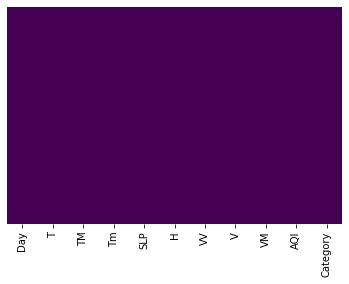

In [64]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [65]:
data.to_csv(r'G:\KHULNA DATA CSV\New Data\Data-2019.csv', index=False)